In [1]:
import os
import random
import numpy as np
import os

# path of PIE and self
pie_path = "D:/University/NUS/EE5907/PIE"
self_path = "D:/University/NUS/EE5907/self"

random.seed(1143583)
selected_individuals = random.sample(os.listdir(pie_path), 25)
print('selected subjects: ', selected_individuals)

# PIE
all_images_paths = []
for subject in selected_individuals:  
    subject_folder = os.path.join(pie_path, str(subject))
    for photo in range(1, 21):  # 20 photo
        photo_path = os.path.join(subject_folder, f"{photo}.jpg")
        all_images_paths.append(photo_path)

# self
for i in range(1, 11):  # 从1.jpg到10.jpg
    photo_path = os.path.join(self_path, f"{i}.jpg")
    all_images_paths.append(photo_path)


'''
for image_path in all_images_paths:
    print(image_path)
'''

selected subjects:  ['1', '26', '34', '58', '57', '24', '12', '49', '51', '41', '3', '7', '56', '61', '23', '25', '4', '14', '65', '68', '18', '28', '32', '21', '44']


'\nfor image_path in all_images_paths:\n    print(image_path)\n'

C:\Users\13104\AppData\Local\Temp\ipykernel_9144\680036409.py:40: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(np.linalg.inv(S_W).dot(S_B), eigvals=(0, 8))


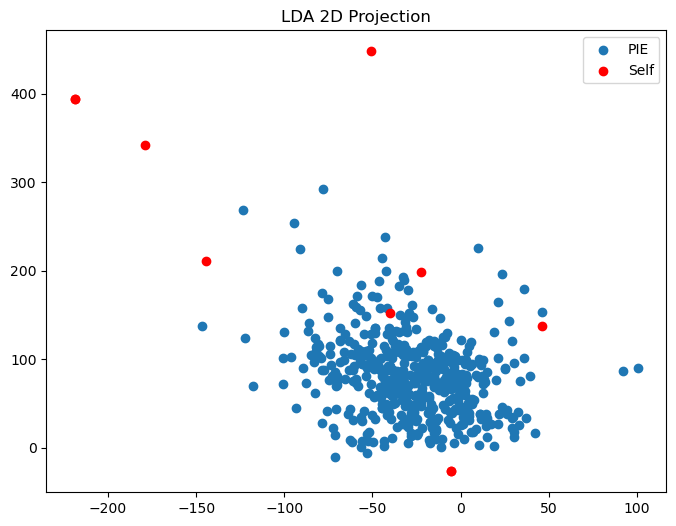

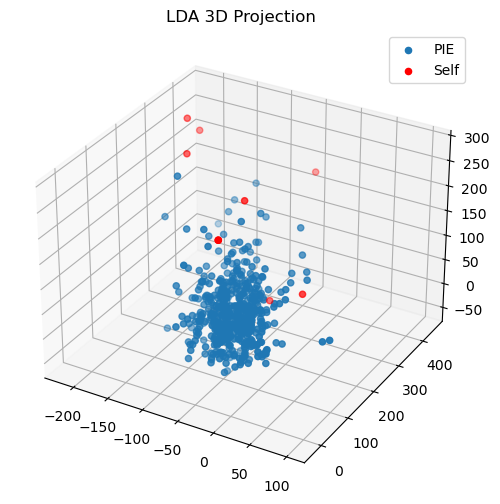

Accuracy for 2D: 93.46%
Accuracy for 2D: 0.00%
Accuracy for 3D: 93.46%
Accuracy for 3D: 0.00%
Accuracy for 9D: 93.46%
Accuracy for 9D: 0.00%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh

# Function to convert an image to grayscale and flatten it
def flatten_image(image_path):
    image = plt.imread(image_path)
    # If the image is color, convert it to grayscale
    if len(image.shape) == 3:
        image = np.mean(image, axis=-1)
    return image.flatten()

# Create a list to store flattened images
flattened_images = [flatten_image(image_path) for image_path in all_images_paths]

X = np.array(flattened_images)

# mark PIE=0, and self=1
y = np.array([0] * 500 + [1] * 10)

# mean
mean_vector = np.mean(X, axis=0)
accuracy_self = 0

# Calculate the intra-class scatter matrix Sw and the inter-class scatter matrix Sb
S_W = np.zeros((X.shape[1], X.shape[1]))
S_B = np.zeros((X.shape[1], X.shape[1]))

for c in np.unique(y):
    class_scatter = np.cov(X[y==c].T)
    S_W += class_scatter

    mean_vector_c = np.mean(X[y==c], axis=0)
    mean_vector = mean_vector.reshape((mean_vector.shape[0], 1))
    mean_vector_c = mean_vector_c.reshape((mean_vector_c.shape[0], 1))
    S_B += len(X[y==c]) * (mean_vector_c - mean_vector).dot((mean_vector_c - mean_vector).T)

# 
eigenvalues, eigenvectors = eigh(np.linalg.inv(S_W).dot(S_B), eigvals=(0, 8)) 

projection_matrix = eigenvectors[:, ::-1]

X_lda = X.dot(projection_matrix)

# 2D visualization
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    if label == 0:
        plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], label=f'PIE')
    else:
        plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1], color='red', label=f'Self')

plt.title('LDA 2D Projection')
plt.legend()
plt.show()

# 3D vivisualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    if label == 0:
        ax.scatter(X_lda[y==label, 0], X_lda[y==label, 1], X_lda[y==label, 2], label='PIE')
    else:
        ax.scatter(X_lda[y==label, 0], X_lda[y==label, 1], X_lda[y==label, 2], color='r', label='Self')

ax.set_title('LDA 3D Projection')
ax.legend()
plt.show()

# KNN
def nn_classifier(train_data, test_data, train_labels, test_labels):
    correct_count = 0
    for i in range(len(test_data)):
        test_instance = test_data[i]
        distances = [np.linalg.norm(train_instance - test_instance) for train_instance in train_data]
        nearest_neighbor_index = np.argmin(distances)
        predicted_label = train_labels[nearest_neighbor_index]

        if predicted_label == test_labels[i]:
            correct_count += 1

    accuracy = correct_count / len(test_data)
    return accuracy

# test set and train set
train_ratio = 0.7
train_size = int(len(X) * train_ratio)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# knn
for dimension in [2, 3 ,9]:
    projection_matrix = eigenvectors[:, -dimension:]
    X_lda = X.dot(projection_matrix)
    X_train_lda, X_test_lda = X_lda[:train_size], X_lda[train_size:]
    accuracy = nn_classifier(X_train_lda, X_test_lda, y_train, y_test)
    accuracyself = nn_classifier(X_train_lda, X_test_lda, y_train, y_test)
    
    print(f"Accuracy for {dimension}D: {accuracy:.2%}")
    print(f"Accuracy for {dimension}D: {accuracy_self:.2%}")